### Naive Bayes Classifier for Digit Recognition (35%)

In [6]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [7]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
# mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
from sklearn.datasets import load_digits
mnist = load_digits()
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]



data shape:  (1797, 64)
label shape: (1797,)


### Create a 10x10 grid to visualize 10 examples of each digit.

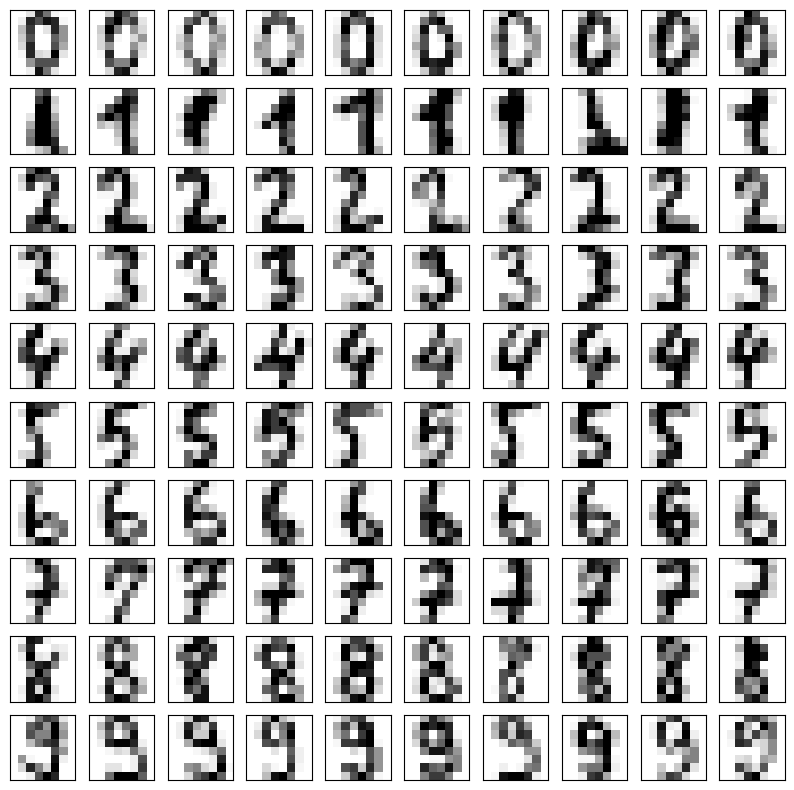

In [8]:
## Solutions

def P1(digit_examples=10):
    # Set the plot colormap & size 
    plt.rc('image',cmap="Greys")
    # Set the plot size 
    plt.figure( figsize=(digit_examples, len(np.unique(Y)) ) )
         
    # Loop each of the grid with the digits * digit_examples (10*10) dimenstion      
    for digit in range(len(np.unique(Y))):
        # Extract 10 example for each digit
        examples = X[np.where(Y == digit)[0][:digit_examples]]
        # Generate the elements of an iterator as well as an index number 
        for index, image in enumerate(examples):
            # Setup the subplot in (Digit, col, location)
            plt.subplot(len(np.unique(Y)), digit_examples, digit * digit_examples + index + 1)
            # Reshape the image into a 8 x 8 matrix
            plt.imshow(image.reshape(8,8))
            # Get current ax instance 
            ax = plt.gca() 
            # hide axis lables
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)

### STUDENT END ###

P1(10)

###  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

In [9]:
## Solutions

###########################  BinaryNB, MultinaryNB #######################
# Fit a Naive Bayes classifier and report accuracy on the dev data.


X, Y = mnist.data, mnist.target
# print(len(X))

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]

#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf7_Binary = BernoulliNB(alpha=1)
clf7_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf7_Binary.score(binarized_dev_data, dev_labels))

#### Trinary Class, Uniform partition ########

threshold1 = 85.0
threshold2 = 170.0
trinarized_X_Train = np.array(train_data)
trinarized_X_Train[trinarized_X_Train <= threshold1] = 0
trinarized_X_Train[np.logical_and(trinarized_X_Train  > threshold1, trinarized_X_Train <= threshold2)] = 1
trinarized_X_Train[trinarized_X_Train  > threshold2] = 2

trinarized_dev_data = np.array(dev_data)
trinarized_dev_data[trinarized_dev_data <= threshold1] = 0
trinarized_dev_data[np.logical_and(trinarized_dev_data  > threshold1, trinarized_dev_data <= threshold2)] = 1
trinarized_dev_data[trinarized_dev_data  > threshold2] = 2

clf7_Trinary = MultinomialNB(alpha=1)
clf7_Trinary.fit(trinarized_X_Train, train_labels)
print('Trinary accuracy: ', clf7_Trinary.score(trinarized_dev_data, dev_labels))

# Adding completely uninform feature (at here we do) will decrease test accuracy.
# Adding informative features will increase accuracy. A Naive Bayes classifier needs
# a alot of samples that's logarithmic in the number of features, so at some point
# adding good features should start decreasing accuracy. Another important
# thing is that using too many features may introduce overfitting problem which 
# decrease accuracy.


Binary accuracy:  0.014285714285714285
Trinary accuracy:  0.014285714285714285


### Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [10]:
## Solutions

# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.

X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1540:], Y[1540:]
dev_data, dev_labels = X[1400:1540], Y[1400:1540]
train_data, train_labels = X[:1400], Y[:1400]
mini_train_data, mini_train_labels = X[:200], Y[:200]


#### Gaussian distribution Class ########

clf9_Gauss = GaussianNB()
clf9_Gauss.fit(train_data, train_labels)
print('Gaussian NB accuracy: ', clf9_Gauss.score(dev_data, dev_labels))

# Because the distribution is not Gaussian, so GaussianNB performance is worse then BinaryNB or MultinaryNB.
# There are two solutions, binarized and distorting Gaussian distribution to make new distribution similar to 
# threshold parition effect.

#### Gaussian distribution Class modification########
# Method 1, binarized_X_Train in Gaussian
# Adjuting threshold value
threshold = 252.5
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

#Using binarized data as train data 
clf9_GaussFix = GaussianNB()
clf9_GaussFix.fit(binarized_X_Train, train_labels)
print('Gaussian NB Fix accuracy by threshold: ', clf9_GaussFix.score(dev_data, dev_labels))

# Method 2, Adjust mean and variance first

def P9():
    clf = GaussianNB()
    clf.fit(train_data, train_labels)
    return clf

gnb = P9()
# search in grid values composed by mean and variance
# Adjust mean, find folloing value is best for signla between 0 and 350
gnb.theta_ += 20
# Adjust variance, find following value is best for signla between 0 and 350 
gnb.sigma_ += 300
print('Gaussian NB Fix accuracy by varaince and mean: ', gnb.score(dev_data, dev_labels) )
### STUDENT END ###

gnb = P9()


#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf9_Binary = BernoulliNB(alpha=1)
clf9_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf9_Binary.score(binarized_dev_data, dev_labels))


Gaussian NB accuracy:  0.7785714285714286
Gaussian NB Fix accuracy by threshold:  0.12857142857142856


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


AttributeError: 'GaussianNB' object has no attribute 'sigma_'